In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import numpy as np
import networkx as nx

from method.learned_cn_method import CNModule, LCIModule
from data import load_network
from util import Params
from data import load_diseases, load_network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print(os.getcwd())

/dfs/scratch0/sabri/dpp-experiments/source/notebooks


**Load Data**

In [4]:
diseases_dict = load_diseases("../../data/associations/disgenet-associations.csv")
m = len(diseases_dict)

In [5]:
ppi_networkx, ppi_network_adj, protein_to_node = load_network("../../data/networks/bio-pathways-network.txt")
n = ppi_network_adj.shape[0]
node_to_protein = {node: protein for protein, node in protein_to_node.items()}

**Popularity of Disease Nodes**

In [6]:
diseases = np.zeros((m, n), dtype=int)
index_to_disease = []
for i, disease in enumerate(diseases_dict.values()):
    disease_nodes = disease.to_node_array(protein_to_node)
    diseases[i, disease_nodes] = 1
    index_to_disease.append(disease)

In [7]:
counts = np.sum(diseases, axis=0)

/dfs/scratch0/sabri/dpp-experiments/env/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'# of Associations')

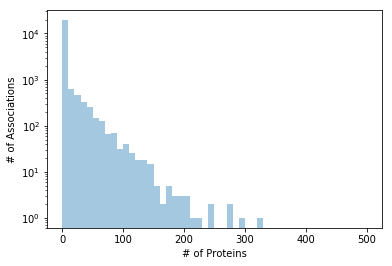

In [8]:
sns.distplot(counts, kde=False, hist_kws={'range':(0, 500)})
plt.yscale("log")
plt.xlabel("# of Proteins")
plt.ylabel("# of Associations")

In [9]:
total_associations = np.matmul(diseases, counts.reshape(n, 1)).squeeze()
average_associations = np.multiply(total_associations, np.power(np.sum(diseases, axis = 1, dtype=float), -1))

Text(0,0.5,'# of Diseases')

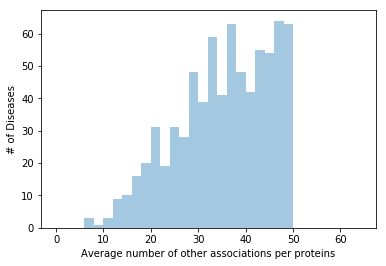

In [10]:
sns.distplot(average_associations, kde=False, hist_kws={'range':(0, 50)})
plt.xlabel("Average number of other associations per proteins")
plt.ylabel("# of Diseases")

In [11]:
common_associations = np.matmul(diseases, diseases.T)
np.fill_diagonal(common_associations, 0)

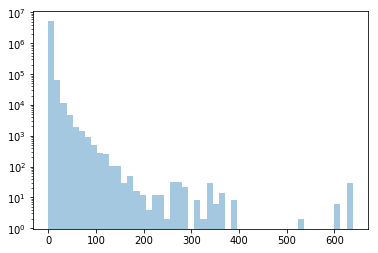

In [12]:
sns.distplot(common_associations.flatten(), kde=False)
plt.yscale("log")

In [13]:
np.max(common_associations.flatten())

638

**Jaccard Similarity**

In [14]:
N = np.sum(diseases, axis=1, keepdims=True)
intersection_size = common_associations
union_size = np.add(N, N.T)
jaccard_sim = 1.0*common_associations / (union_size - common_associations)
jaccard_sim

array([[0.        , 0.05555556, 0.        , ..., 0.        , 0.05172414,
        0.        ],
       [0.05555556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.04      ,
        0.        ],
       [0.05172414, 0.        , 0.        , ..., 0.04      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
common = np.where(jaccard_sim > 0.2)
print(len(common[0]))

14004


In [16]:
["{}:{},{}".format(jaccard_sim[a,b], index_to_disease[a].name, index_to_disease[b].name) for a,b in zip(*common)]

['0.965517241379:Choreatic disease,Chorea',
 '1.0:Pyramidal tract disease,Morphological abnormality of the pyramidal tract',
 '0.233333333333:Pyramidal tract disease,Pyramidal sign',
 '0.25:Abnormal eyelashes,Eyebrow abnormalities',
 '0.25:Arnold Chiari Malformation,Coronal craniosynostosis',
 '0.210526315789:Arnold Chiari Malformation,Acrocephaly',
 '0.275862068966:Metaphyseal cupping,Rhizomelia',
 '0.212121212121:Metaphyseal cupping,Short ribs',
 '0.222222222222:Metaphyseal cupping,Metaphyseal irregularity',
 '0.214285714286:Metaphyseal cupping,Short tubular bones',
 '0.333333333333:Cortical white matter abnormalities seen on MRI,Dyslexia',
 '0.36:Cortical white matter abnormalities seen on MRI,Loss of speech',
 '1.0:Cortical white matter abnormalities seen on MRI,Leukoaraiosis',
 '0.217391304348:Cortical white matter abnormalities seen on MRI,Mutism',
 '0.259259259259:Cortical white matter abnormalities seen on MRI,Dysgraphia',
 '0.205882352941:Cortical white matter abnormalities se

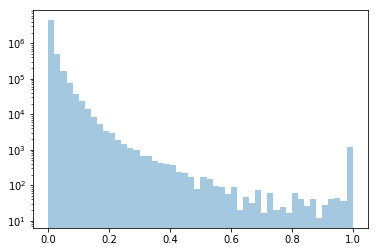

In [17]:
sns.distplot(jaccard_sim.flatten(), kde=False)
plt.yscale("log")

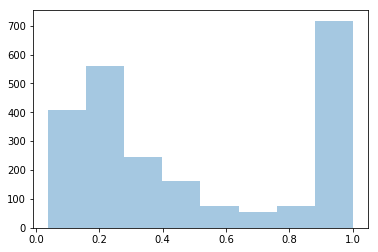

In [18]:
sns.distplot(np.max(jaccard_sim, axis=1), kde=False)

**Min Cut**

In [19]:
jaccard_network = nx.from_numpy_matrix(jaccard_sim)

In [20]:
np.argsort(np.sum(jaccard_sim, axis=1))

array([2115, 1569,  972, ...,  513, 1094,  846])

In [21]:
nx.number_connected_components(jaccard_network)

1

In [123]:
nx.minimum_cut(jaccard_network, 2115, 1569, capacity='weight')

(1.1245295143461473,
 ({2115},
  {0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,

In [17]:
jaccard_thresh_network = nx.from_numpy_matrix(jaccard_sim>0.3)

In [18]:
nx.number_connected_components(jaccard_thresh_network)

1359

In [22]:
map(len, sorted(list(nx.connected_components(jaccard_thresh_network)), key=len, reverse=True))

[114,
 60,
 49,
 28,
 21,
 14,
 14,
 14,
 14,
 13,
 13,
 11,
 10,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2

**LCI Weights**

In [39]:
params = Params("../../experiments/disgenet/bio-pathways/dpp-10/learned_cn/cn_weighting/vec_lr_1e-0_ones_relu/params.json")

In [40]:
model = LCIModule(params, ppi_network_adj)

In [41]:
weights_path = "../../experiments/disgenet/bio-pathways/dpp-10/learned_cn/cn_weighting/lr_1e-0_ones/best.pth.tar"

In [42]:
state_dict = torch.load(weights_path)["state_dict"]

In [43]:
E = state_dict['W_intermediate'].cpu().numpy().squeeze()

In [35]:
disease_counts = np.sum(diseases, axis=0)

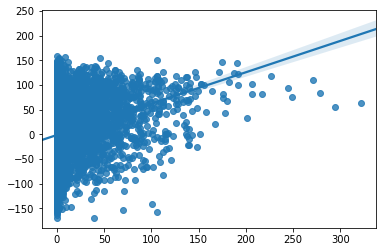

In [38]:
sns.regplot(x=disease_counts, y=E)

In [40]:
neighbors = np.matmul(diseases, ppi_network_adj)

In [41]:
neighbor_counts = np.sum(neighbors, axis=0)

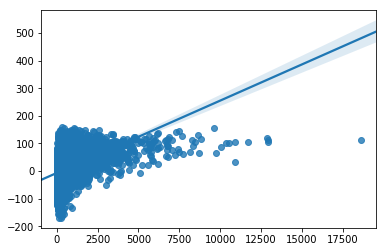

In [42]:
sns.regplot(x=neighbor_counts, y=E)

In [45]:
disease_neighbor_counts = np.sum(neighbors > 0, axis=0)

In [46]:
from scipy.stats import pearsonr

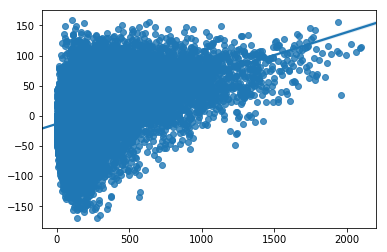

In [46]:
sns.regplot(x=disease_neighbor_counts, y=E, )

In [49]:
pearsonr(disease_neighbor_counts, E)

(0.46524025797812424, 0.0)

In [52]:
disease_proteins = np.array(np.sum(diseases, axis=0) > 0, dtype=np.float32)

In [56]:
counts = np.matmul(disease_proteins, ppi_network_adj)

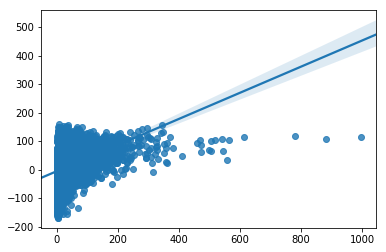

In [57]:
sns.regplot(x=counts, y=E)

In [58]:
pearsonr(counts, E)

(0.35525042250332567, 0.0)

In [22]:
adj = ppi_network_adj

In [33]:
from tqdm import tqdm_notebook as tqdm

In [34]:
common_interactors = [set() for i in range(adj.shape[0])]
for disease in tqdm(diseases_dict.values()):
    proteins = disease.to_node_array(protein_to_node)
    for protein_a in proteins:
        for protein_b in proteins:
            if protein_a == protein_b:
                continue 
            neighbors_a = adj[protein_a, :]
            neighbors_b = adj[protein_b, :]
            cis = np.where(np.multiply(neighbors_a, neighbors_b) == 1)[0]
            for ci in cis:
                common_interactors[ci].add((protein_a, protein_b))

Exception KeyError: KeyError(<weakref at 0x7fe8e17ecaf8; to 'tqdm' at 0x7fe8e13ffb10>,) in <bound method tqdm.__del__ of   1%|          | 28/2297 [12:51<15:25,  2.45it/s]> ignored
Exception KeyError: KeyError(<weakref at 0x7fe8e17ec788; to 'tqdm' at 0x7fea701f02d0>,) in <object repr() failed> ignored


In [66]:
disease_pairs = np.array(map(len, common_interactors))

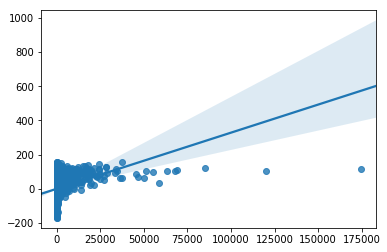

In [44]:
sns.regplot(x=disease_pairs, y=E)

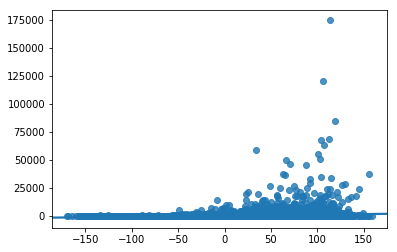

In [72]:
sns.regplot(x=E, y=disease_pairs)

In [74]:
pearsonr(E, disease_pairs)

(0.1752640933039345, 2.882073937141949e-148)

In [51]:
possible_pairs = np.power(np.sum(adj, axis=0), 2)

In [52]:
frac_pairs_disease = disease_pairs / possible_pairs

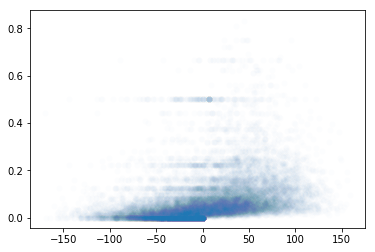

In [70]:
sns.scatterplot(x=E, y=frac_pairs_disease, alpha=0.011)

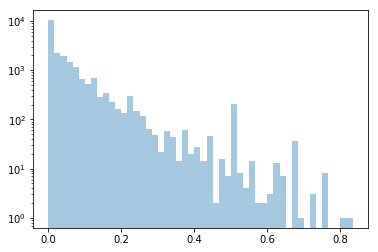

In [56]:
sns.distplot(frac_pairs_disease, kde=False)
plt.yscale('log')

In [60]:
len(np.where(frac_pairs_disease <=1e-5)[0])

8716